In [50]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
%matplotlib inline
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
merged_df = pd.read_csv('NHANES_merged.csv')

In [53]:
merged_df.head()

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD2,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L)
0,62161.0,7.0,1.0,22.0,264.0,3.0,N\A,69.2,23.3,NaN,...,1.45,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62162.0,7.0,2.0,3.0,36.0,1.0,N\A,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,1.0,14.0,168.0,5.0,N\A,49.4,17.3,NaN,...,1.45,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62164.0,7.0,2.0,44.0,528.0,3.0,2.0,67.2,23.2,NaN,...,1.45,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62165.0,7.0,2.0,14.0,168.0,4.0,N\A,69.1,27.2,NaN,...,1.45,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
merged_df.shape

(101316, 52)

In [55]:
# check non-null rows per column
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101316 entries, 0 to 101315
Data columns (total 52 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    101316 non-null  float64
 1   Yr_Cycle              101316 non-null  float64
 2   Gender                101316 non-null  float64
 3   Age(yr)               101316 non-null  float64
 4   Age(Months)           101316 non-null  float64
 5   Race                  101316 non-null  float64
 6   PregnStat             101316 non-null  object 
 7   Weight                95182 non-null   float64
 8   BMI                   87799 non-null   float64
 9   alco_dks_daily#       31951 non-null   float64
 10  smokescigs_daily#     9993 non-null    float64
 11  had_anemia_treatment  59074 non-null   float64
 12  had_cancer            33141 non-null   float64
 13  cancertype1           3094 non-null    float64
 14  cancertype2           315 non-null     float64
 15  

In [56]:
# check total null rows per column
merged_df.isna().sum()

ID                           0
Yr_Cycle                     0
Gender                       0
Age(yr)                      0
Age(Months)                  0
Race                         0
PregnStat                    0
Weight                    6134
BMI                      13517
alco_dks_daily#          69365
smokescigs_daily#        91323
had_anemia_treatment     42242
had_cancer               68175
cancertype1              98222
cancertype2             101001
cancertype3             101281
HIV                      68102
White_Cell_num           18393
Lymphocyte(%)            18572
Monocyte(%)              18572
SegNeutrophil(%)         18572
Eosinophil(%)            18572
Basophil(%)              18572
Lymphocyte_num           18575
Monocyte_num             18575
SegNeutrophil_num        18575
Eosinophil_num           18575
Basophil_num             18575
Red_Cell_num             18390
Subsweights              93318
Cu(ug/dL)                94031
Cu(umol/L)               94031
Se(ug/L)

In [57]:
#Replace gender and race columns with categorical values
merged_df["Gender"].replace({1: 'M', 2: 'F'}, inplace = True)
merged_df["Race"].replace({1: 'White', 2: 'Black', 3: 'MexAm', 4: 'Other', 5: 'Other-Hisp'}, inplace = True)

In [58]:
merged_df.head()

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD2,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L)
0,62161.0,7.0,M,22.0,264.0,MexAm,N\A,69.2,23.3,NaN,...,1.45,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62162.0,7.0,F,3.0,36.0,White,N\A,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,N\A,49.4,17.3,NaN,...,1.45,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62164.0,7.0,F,44.0,528.0,MexAm,2.0,67.2,23.2,NaN,...,1.45,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62165.0,7.0,F,14.0,168.0,Other,N\A,69.1,27.2,NaN,...,1.45,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
#Replace pregnant and race columns with categorical values
merged_df["PregnStat"].value_counts()

N\A    81776
2.0    16164
1.0     1722
3.0     1654
Name: PregnStat, dtype: int64

In [60]:
merged_df["PregnStat"].replace({'1.0':'Yes', '2.0':'No', '3.0':'Unk', 'N\A': 'No'}, inplace = True)

In [61]:
merged_df.head(15)

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD2,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L)
0,62161.0,7.0,M,22.0,264.0,MexAm,No,69.2,23.3,NaN,...,1.45,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,62162.0,7.0,F,3.0,36.0,White,No,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,No,49.4,17.3,NaN,...,1.45,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,62164.0,7.0,F,44.0,528.0,MexAm,No,67.2,23.2,NaN,...,1.45,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,62165.0,7.0,F,14.0,168.0,Other,No,69.1,27.2,NaN,...,1.45,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,62166.0,7.0,M,9.0,108.0,MexAm,No,28.8,16.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,62167.0,7.0,M,0.0,11.0,Other-Hisp,No,10.8,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,62168.0,7.0,M,6.0,72.0,Other-Hisp,No,23.6,15.4,NaN,...,7.78,74.18,5.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,62169.0,7.0,M,21.0,252.0,Other-Hisp,No,54.6,20.1,2.0,...,1.45,24.39,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,62170.0,7.0,M,15.0,180.0,Other-Hisp,No,63.5,18.2,NaN,...,3.19,82.49,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Distribution of WBC counts

A low white blood cell count may indicate an white blood cell production issues due to malnutrition, autoimmune disorder, cancer, age, race or other lifestyle factors. If the white blood cell count is high, this might be because of an infection or inflammation. It can also indicate problems with the bone marrow or immune system, or a reaction to a medication. 

The cutoffs

White blood cells 4.5 to 12 ug/L

neutrophils: 1.5 to 8 ug/L    40% to 60%

lymphocytes: 1.4 to 5.7 ug/L  20% to 40%

monocytes: 0.3 to 1 ug/L      2% to 8%

eosinophils: 0 to 1 ug/L      1% to 4%

Basophils:  0 to 1 ug/L       0.5% to 1%

In [62]:
#Check the distribution of WBC
merged_df['Lymphocyte(%)'].describe()

count    82744.000000
mean        33.616705
std         10.715035
min          2.600000
25%         26.300000
50%         32.400000
75%         39.800000
max         94.500000
Name: Lymphocyte(%), dtype: float64

In [63]:
merged_df['Eosinophil(%)'].describe()

count    8.274400e+04
mean     3.035912e+00
std      2.438622e+00
min      5.397605e-79
25%      1.500000e+00
50%      2.400000e+00
75%      3.800000e+00
max      5.720000e+01
Name: Eosinophil(%), dtype: float64

In [64]:
merged_df['Monocyte(%)'].describe()

count    82744.000000
mean         8.039510
std          2.360588
min          0.600000
25%          6.500000
50%          7.800000
75%          9.300000
max         66.900000
Name: Monocyte(%), dtype: float64

In [65]:
merged_df['SegNeutrophil_num'].describe()

count    82741.000000
mean         4.063330
std          1.788205
min          0.100000
25%          2.800000
50%          3.800000
75%          5.000000
max         83.100000
Name: SegNeutrophil_num, dtype: float64

In [66]:
merged_df['Basophil(%)'].describe()

count    8.274400e+04
mean     7.017802e-01
std      5.352531e-01
min      5.397605e-79
25%      4.000000e-01
50%      6.000000e-01
75%      9.000000e-01
max      3.540000e+01
Name: Basophil(%), dtype: float64

In [67]:
merged_df['White_Cell_num'].describe()

count    82923.000000
mean         7.307269
std          2.743337
min          1.400000
25%          5.700000
50%          7.000000
75%          8.500000
max        400.000000
Name: White_Cell_num, dtype: float64

In [68]:
#Check how many entries fall outside the normal range of the lymphocyte number count

merged_df[(merged_df['Lymphocyte_num'] < 1.4) | (merged_df['Lymphocyte_num'] > 5.7)].count()

ID                      7563
Yr_Cycle                7563
Gender                  7563
Age(yr)                 7563
Age(Months)             7563
Race                    7563
PregnStat               7563
Weight                  7389
BMI                     6730
alco_dks_daily#         3188
smokescigs_daily#        541
had_anemia_treatment    4730
had_cancer              3496
cancertype1              630
cancertype2               90
cancertype3               11
HIV                     2313
White_Cell_num          7563
Lymphocyte(%)           7563
Monocyte(%)             7563
SegNeutrophil(%)        7563
Eosinophil(%)           7563
Basophil(%)             7563
Lymphocyte_num          7563
Monocyte_num            7563
SegNeutrophil_num       7563
Eosinophil_num          7563
Basophil_num            7563
Red_Cell_num            7563
Subsweights              635
Cu(ug/dL)                625
Cu(umol/L)               625
Se(ug/L)                 625
Se(umol/L)               625
Zn(ug/dL)     

In [69]:
#Check how many entries fall outside the normal range of the lymphocyte %
#these numbers are different from lymphocyte number counts
#Since both numbers should be within the correct ranges we have to take into consideration both
merged_df[(merged_df['Lymphocyte(%)'] < 20) | (merged_df['Lymphocyte(%)'] > 40)].count()

ID                      26729
Yr_Cycle                26729
Gender                  26729
Age(yr)                 26729
Age(Months)             26729
Race                    26729
PregnStat               26729
Weight                  26337
BMI                     24554
alco_dks_daily#          6897
smokescigs_daily#        2101
had_anemia_treatment    16516
had_cancer               6999
cancertype1               765
cancertype2                85
cancertype3                 8
HIV                      7255
White_Cell_num          26727
Lymphocyte(%)           26729
Monocyte(%)             26729
SegNeutrophil(%)        26729
Eosinophil(%)           26729
Basophil(%)             26729
Lymphocyte_num          26727
Monocyte_num            26727
SegNeutrophil_num       26727
Eosinophil_num          26727
Basophil_num            26727
Red_Cell_num            26729
Subsweights              2056
Cu(ug/dL)                2010
Cu(umol/L)               2010
Se(ug/L)                 2010
Se(umol/L)

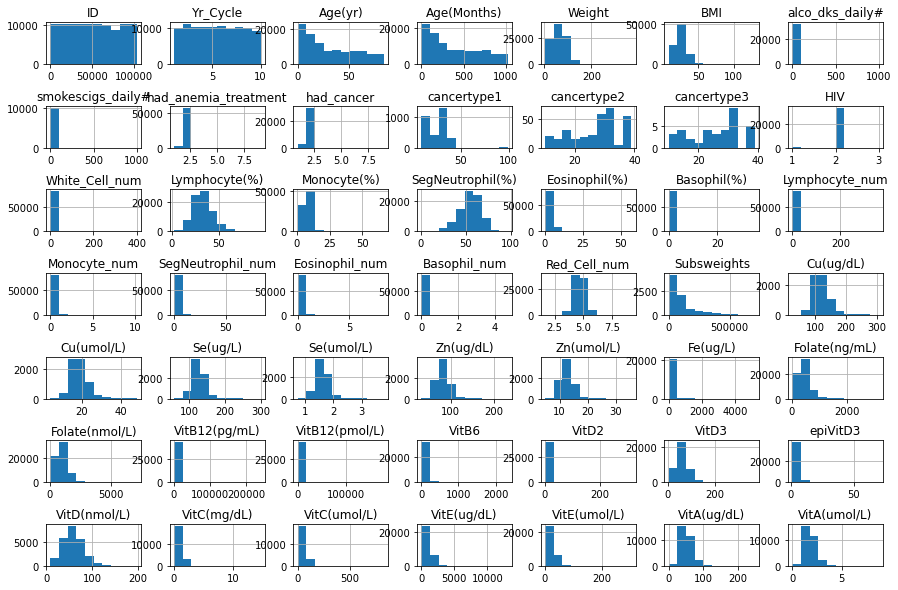

In [70]:
#Visualize distribution for each feature
merged_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=1.0)

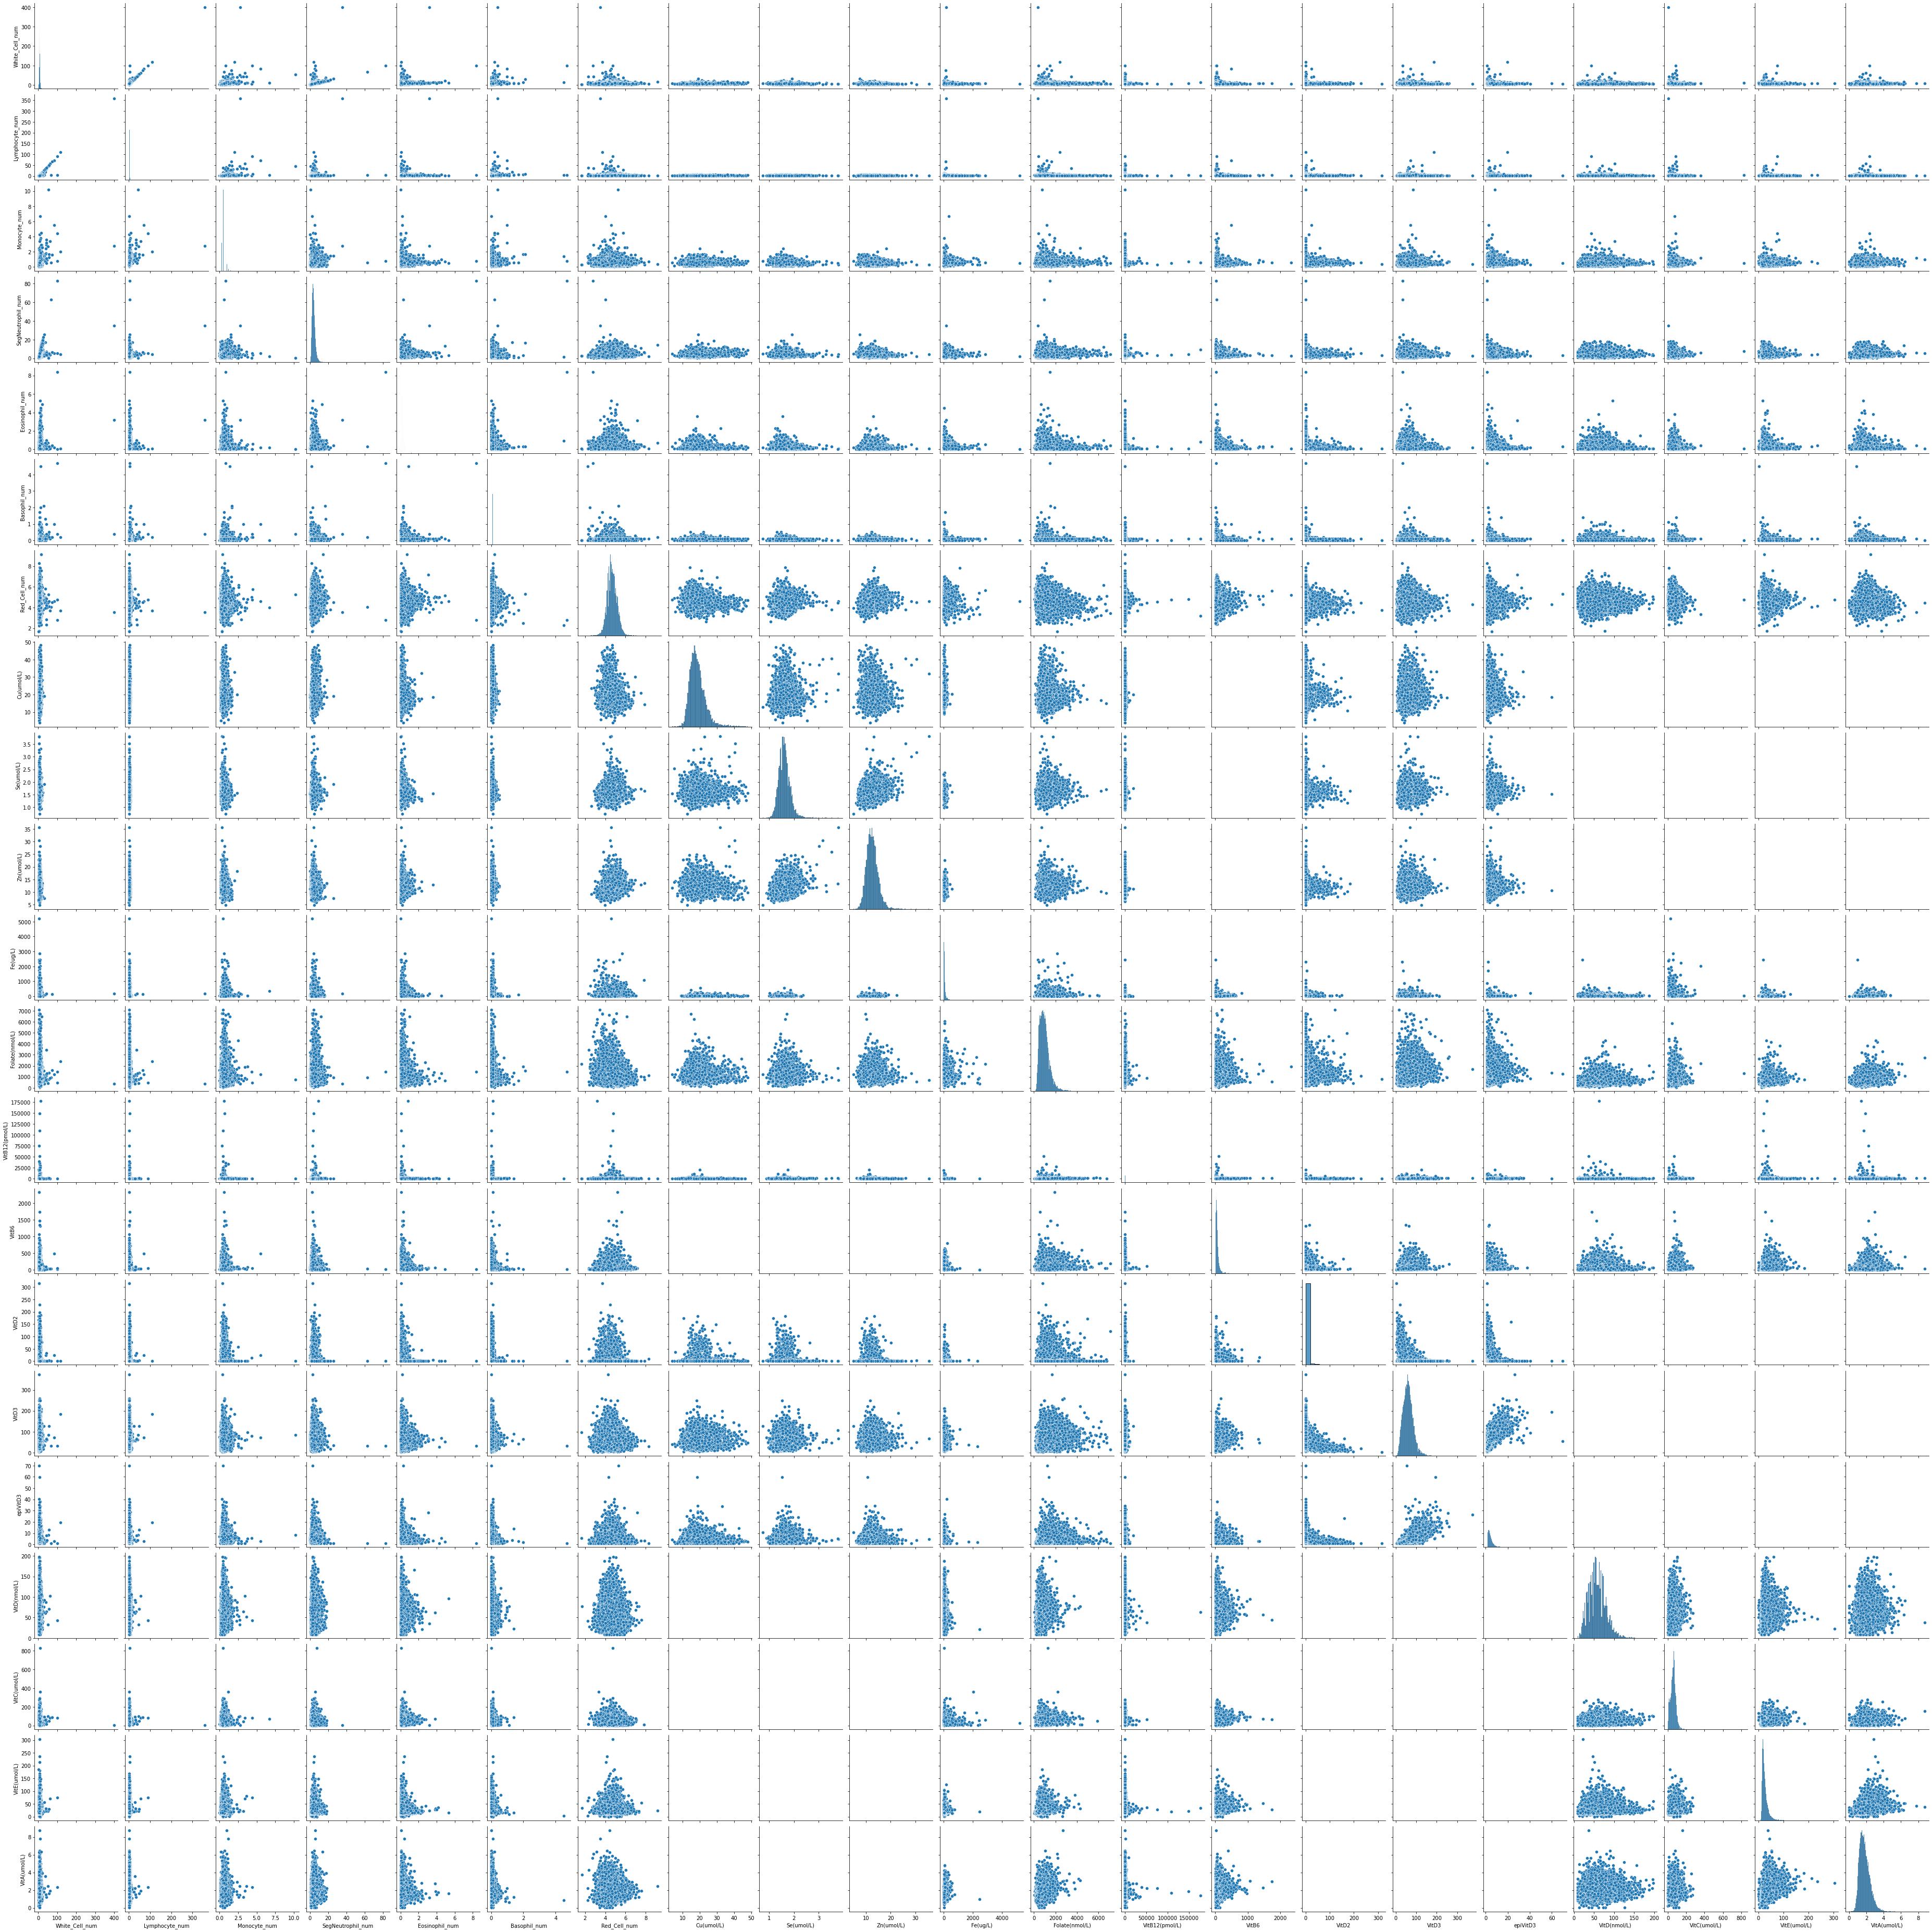

In [71]:
#Remove categorical data and visualize relationships between features
sel_colnames = {
    "LBXWBCSI" : "White_Cell_num",
    "LBDLYMNO" : "Lymphocyte_num",
    "LBDMONO" : "Monocyte_num",
    "LBDNENO" : "SegNeutrophil_num",
    "LBDEONO" : "Eosinophil_num",
    "LBDBANO" : "Basophil_num",
    "LBXRBCSI" : "Red_Cell_num",
    'LBDSCUSI': 'Cu(umol/L)',
    'LBDSSESI': 'Se(umol/L)',
    'LBDSZNSI': 'Zn(umol/L)',
    'LBDFERSI': 'Fe(ug/L)',
    'LBDRFOSI':'Folate(nmol/L)',
    'LBDB12SI':'VitB12(pmol/L)', 
    'LBXPLP':'VitB6',
    'LBXVD2MS':'VitD2', 
    'LBXVD3MS':'VitD3', 
    'LBXVE3MS':'epiVitD3',
    'LBDVIDMS':'VitD(nmol/L)', 
    'LBDVICSI':'VitC(umol/L)', 
    'LBDVIESI':'VitE(umol/L)', 
    'LBDVIASI':'VitA(umol/L)'   
}
df = merged_df[list(sel_colnames.values())]
sns.pairplot(df)

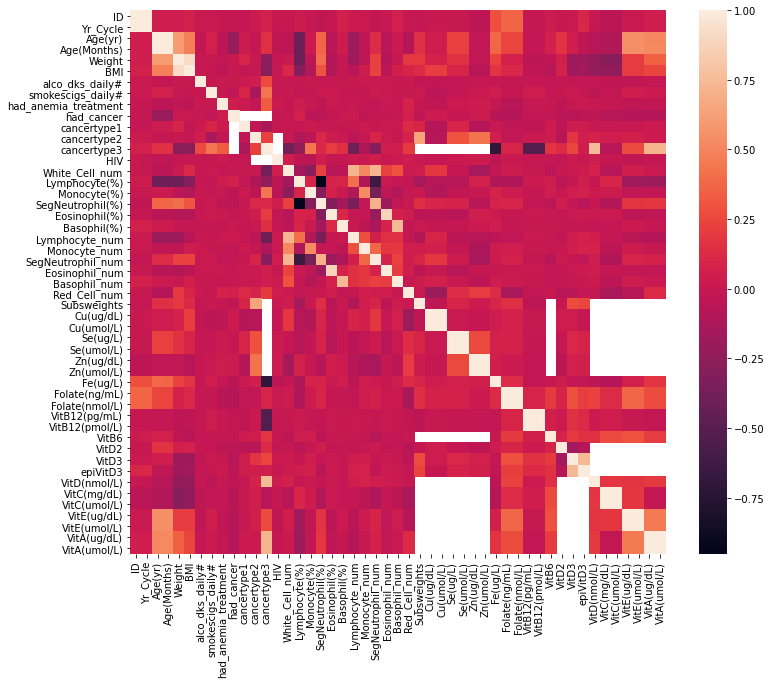

In [72]:
#Correlation heatmap
plt.subplots(figsize=(12,10))
sns.heatmap(merged_df.corr());

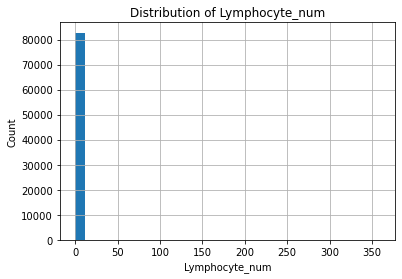

In [73]:
#Distribution of lymphocyte number shows there are outliers
merged_df.Lymphocyte_num.hist(bins=30)
plt.xlabel('Lymphocyte_num')
plt.ylabel('Count')
plt.title('Distribution of Lymphocyte_num');

In [74]:
#Check for outliers
#One data point was shown
merged_df['Lymphocyte_num'][merged_df['Lymphocyte_num'] > 350]

100748    358.8
Name: Lymphocyte_num, dtype: float64

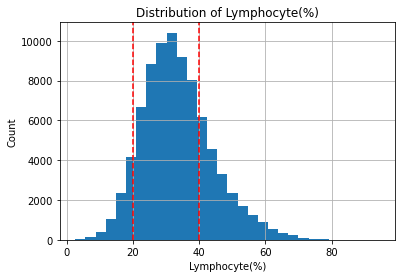

In [75]:
#Visualize the distribution without the outlier
#One data point was excluded
#The dashed red lines show the upper and lower limits of the normal range
merged_df['Lymphocyte(%)'].hist(bins=30)
plt.xlabel('Lymphocyte(%)')
plt.ylabel('Count')
plt.title('Distribution of Lymphocyte(%)')
_ = plt.axvline(20.0, color='r', linestyle='--')
_ = plt.axvline(40.0, color='r', linestyle='--');

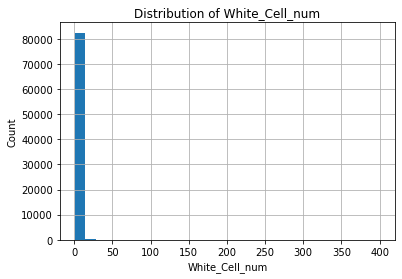

In [76]:
#Distribution of total White blood cell number shows there are outliers
merged_df['White_Cell_num'].hist(bins=30)
plt.xlabel('White_Cell_num')
plt.ylabel('Count')
plt.title('Distribution of White_Cell_num');

In [77]:
#Show all data points above 50
merged_df['White_Cell_num'][merged_df['White_Cell_num'] > 50]

3232       54.70
18243      99.90
19204      68.30
24021      52.20
25190      55.90
39876      83.20
67006      99.99
71785      62.80
74346      55.70
84167     117.20
93830      74.20
100748    400.00
Name: White_Cell_num, dtype: float64

In [78]:
#Transposed dataof white cell numbers excluding one outlier 
merged_df[merged_df['White_Cell_num'] > 350].T

,100748
ID,102389.0
Yr_Cycle,10.0
Gender,F
Age(yr),71.0
Age(Months),852.0
Race,Other
PregnStat,No
Weight,85.8
BMI,32.0
alco_dks_daily#,2.0


In [122]:
#drop row
new_df = merged_df[merged_df['White_Cell_num'] < 20]

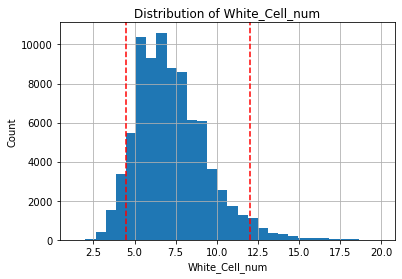

In [95]:
new_df['White_Cell_num'].hist(bins=30)
plt.xlabel('White_Cell_num')
plt.ylabel('Count')
plt.title('Distribution of White_Cell_num')
_ = plt.axvline(4.5, color='r', linestyle='--')
_ = plt.axvline(12.0, color='r', linestyle='--');

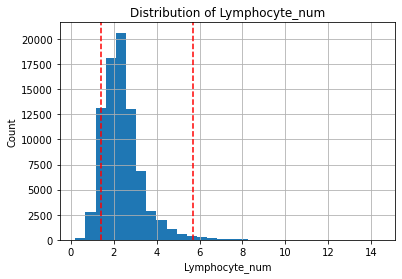

In [123]:
new_df.Lymphocyte_num.hist(bins=30)
plt.xlabel('Lymphocyte_num')
plt.ylabel('Count')
plt.title('Distribution of Lymphocyte_num');
_ = plt.axvline(1.4, color='r', linestyle='--')
_ = plt.axvline(5.7, color='r', linestyle='--')

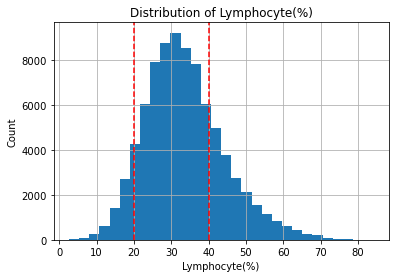

In [97]:
#lymphocyte percentage distribution without the outlier
new_df['Lymphocyte(%)'].hist(bins=30)
plt.xlabel('Lymphocyte(%)')
plt.ylabel('Count')
plt.title('Distribution of Lymphocyte(%)')
_ = plt.axvline(20.0, color='r', linestyle='--')
_ = plt.axvline(40.0, color='r', linestyle='--');

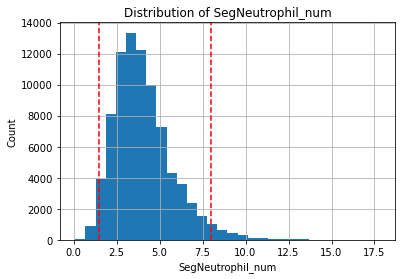

In [98]:
new_df.SegNeutrophil_num .hist(bins=30)
plt.xlabel('SegNeutrophil_num')
plt.ylabel('Count')
plt.title('Distribution of SegNeutrophil_num');
_ = plt.axvline(1.5, color='r', linestyle='--')
_ = plt.axvline(8.0, color='r', linestyle='--')

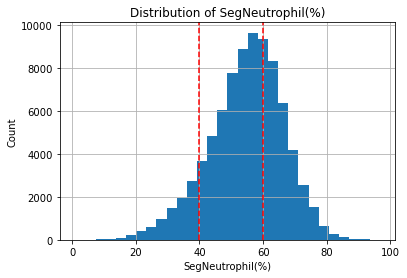

In [99]:
#neutrophil percentage distribution without the outlier
new_df['SegNeutrophil(%)'].hist(bins=30)
plt.xlabel('SegNeutrophil(%)')
plt.ylabel('Count')
plt.title('Distribution of SegNeutrophil(%)')
_ = plt.axvline(40.0, color='r', linestyle='--')
_ = plt.axvline(60.0, color='r', linestyle='--');

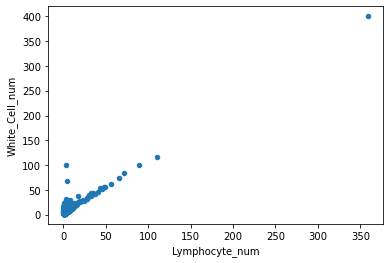

In [90]:
#Relationship between White cell num and lymphocyte num
merged_df.plot(x='Lymphocyte_num', y='White_Cell_num', kind='scatter');

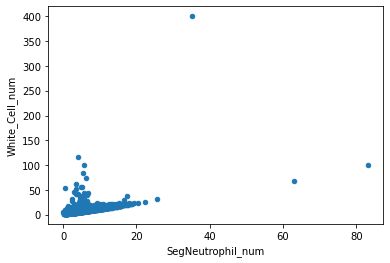

In [91]:
#Relationship between White cell num and SegNeutrophil_num
merged_df.plot(x='SegNeutrophil_num', y='White_Cell_num', kind='scatter');

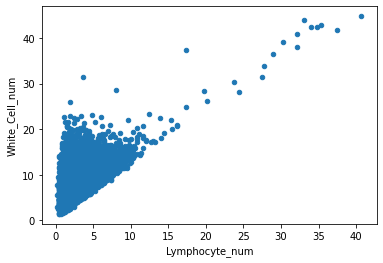

In [92]:
#Relationship between White cell num and lymphocyte num without outliers
new_df.plot(x='Lymphocyte_num', y='White_Cell_num', kind='scatter');

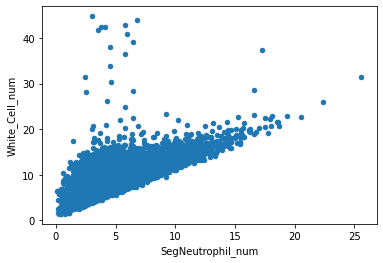

In [93]:
#Relationship between White cell num and SegNeutrophil_num  without outliers
new_df.plot(x='SegNeutrophil_num', y='White_Cell_num', kind='scatter');

In [101]:
#Lymphocytes are an essential part of the immune system because they activate the rest of the immune system during an infection
#Lymphocyte_num is the important value that we want to use as a measure of immunity strength
# drop rows without Lymphocyte_num. This removes all the NA values in the othe WBC columns
merged_df = merged_df[merged_df['Lymphocyte_num'].notna()]

In [102]:
# check non-null rows per column
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82741 non-null  float64
 1   Yr_Cycle              82741 non-null  float64
 2   Gender                82741 non-null  object 
 3   Age(yr)               82741 non-null  float64
 4   Age(Months)           82741 non-null  float64
 5   Race                  82741 non-null  object 
 6   PregnStat             82741 non-null  object 
 7   Weight                81703 non-null  float64
 8   BMI                   79625 non-null  float64
 9   alco_dks_daily#       30711 non-null  float64
 10  smokescigs_daily#     9162 non-null   float64
 11  had_anemia_treatment  50635 non-null  float64
 12  had_cancer            29854 non-null  float64
 13  cancertype1           2713 non-null   float64
 14  cancertype2           267 non-null    float64
 15  cancertype3       

In [103]:
#Cu Se and Zn are the three micronutrients of interest. The have shown to boost the immune system in mice studies but not in humans
#They were measured in three cycles only
#Drop all cells without Cu values. 
#approx 10% of the data contains this data 
#this same potion of the data is missing important vitamin data
cu_df = merged_df[merged_df['Cu(ug/dL)'].notna()]
cu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7260 entries, 7 to 92052
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7260 non-null   float64
 1   Yr_Cycle              7260 non-null   float64
 2   Gender                7260 non-null   object 
 3   Age(yr)               7260 non-null   float64
 4   Age(Months)           7260 non-null   float64
 5   Race                  7260 non-null   object 
 6   PregnStat             7260 non-null   object 
 7   Weight                7185 non-null   float64
 8   BMI                   7177 non-null   float64
 9   alco_dks_daily#       3290 non-null   float64
 10  smokescigs_daily#     1066 non-null   float64
 11  had_anemia_treatment  2326 non-null   float64
 12  had_cancer            1645 non-null   float64
 13  cancertype1           135 non-null    float64
 14  cancertype2           12 non-null     float64
 15  cancertype3         

In [104]:
#Same as for Cu
se_df = merged_df[merged_df['Se(ug/L)'].notna()]
se_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7259 entries, 7 to 92052
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    7259 non-null   float64
 1   Yr_Cycle              7259 non-null   float64
 2   Gender                7259 non-null   object 
 3   Age(yr)               7259 non-null   float64
 4   Age(Months)           7259 non-null   float64
 5   Race                  7259 non-null   object 
 6   PregnStat             7259 non-null   object 
 7   Weight                7184 non-null   float64
 8   BMI                   7176 non-null   float64
 9   alco_dks_daily#       3290 non-null   float64
 10  smokescigs_daily#     1065 non-null   float64
 11  had_anemia_treatment  2326 non-null   float64
 12  had_cancer            1645 non-null   float64
 13  cancertype1           135 non-null    float64
 14  cancertype2           12 non-null     float64
 15  cancertype3         

In [105]:
#Filter rows containing Vitamin B6 data
VitB6_df = merged_df[merged_df['VitB6'].notna()]
VitB6_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32579 entries, 9756 to 71915
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    32579 non-null  float64
 1   Yr_Cycle              32579 non-null  float64
 2   Gender                32579 non-null  object 
 3   Age(yr)               32579 non-null  float64
 4   Age(Months)           32579 non-null  float64
 5   Race                  32579 non-null  object 
 6   PregnStat             32579 non-null  object 
 7   Weight                32248 non-null  float64
 8   BMI                   31438 non-null  float64
 9   alco_dks_daily#       11798 non-null  float64
 10  smokescigs_daily#     4230 non-null   float64
 11  had_anemia_treatment  32579 non-null  float64
 12  had_cancer            19669 non-null  float64
 13  cancertype1           1827 non-null   float64
 14  cancertype2           172 non-null    float64
 15  cancertype3     

In [106]:
# Filter rows containing Fe data
fe_df = merged_df[merged_df['Fe(ug/L)'].notna()]
fe_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20602 entries, 9757 to 101315
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    20602 non-null  float64
 1   Yr_Cycle              20602 non-null  float64
 2   Gender                20602 non-null  object 
 3   Age(yr)               20602 non-null  float64
 4   Age(Months)           20602 non-null  float64
 5   Race                  20602 non-null  object 
 6   PregnStat             20602 non-null  object 
 7   Weight                20387 non-null  float64
 8   BMI                   19388 non-null  float64
 9   alco_dks_daily#       7526 non-null   float64
 10  smokescigs_daily#     2486 non-null   float64
 11  had_anemia_treatment  11346 non-null  float64
 12  had_cancer            5399 non-null   float64
 13  cancertype1           222 non-null    float64
 14  cancertype2           13 non-null     float64
 15  cancertype3    

Normally medical professionals use cutoff ranges for the different wite blood cells and the percentages. The most important of these are the Neutrophils which act as the first line of defense during an infection and therefore must always be present in the normal quantities; and Lymphocytes(Tcells and Bcells) which activate the rest of the immune system and induce more production of immune cells and antibodies. Low levels of the other immune cells do necessarily indicate the state of the immune system since these cells are normally produced during an infection. 

The cutoffs that were used were from <a href="https://www.sightdx.com/knowledge-center/cbc">this website</a> .   These may differ from lab to lab. No upper limit was used since high levels of WBC that exceed the upper limit can be a result of an acute infection which does not necessarily indicate the state of the immune system.

In [107]:
#To label the data according to immune strength, cutoffs for Lyphocyte and Neutrophil numbers were selected
# create a list of our conditions
conditions = [
    (merged_df['Lymphocyte_num'] >= 1.4) & (merged_df['Lymphocyte(%)'] >= 22) &
    (merged_df['SegNeutrophil_num'] >= 1.5) & (merged_df['SegNeutrophil(%)'] >= 55) &
    (merged_df['White_Cell_num'] >= 4.5)
    ]

# create a list of the values we want to assign for each condition
values = ['High']

# create a new column and use np.select to assign values to it using our lists as arguments
merged_df['immunity_strength'] = np.select(conditions, values)
merged_df.head(15)

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L),immunity_strength
0,62161.0,7.0,M,22.0,264.0,MexAm,No,69.2,23.3,NaN,...,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,62162.0,7.0,F,3.0,36.0,White,No,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,No,49.4,17.3,NaN,...,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,62164.0,7.0,F,44.0,528.0,MexAm,No,67.2,23.2,NaN,...,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
4,62165.0,7.0,F,14.0,168.0,Other,No,69.1,27.2,NaN,...,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,62168.0,7.0,M,6.0,72.0,Other-Hisp,No,23.6,15.4,NaN,...,74.18,5.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,62169.0,7.0,M,21.0,252.0,Other-Hisp,No,54.6,20.1,2.0,...,24.39,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,62170.0,7.0,M,15.0,180.0,Other-Hisp,No,63.5,18.2,NaN,...,82.49,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
10,62171.0,7.0,M,14.0,168.0,White,No,58.2,19.9,NaN,...,55.75,5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
11,62172.0,7.0,F,43.0,516.0,Other,No,98.6,33.3,3.0,...,35.13,3.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High


In [108]:
merged_df.shape

(82741, 53)

In [109]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82741 non-null  float64
 1   Yr_Cycle              82741 non-null  float64
 2   Gender                82741 non-null  object 
 3   Age(yr)               82741 non-null  float64
 4   Age(Months)           82741 non-null  float64
 5   Race                  82741 non-null  object 
 6   PregnStat             82741 non-null  object 
 7   Weight                81703 non-null  float64
 8   BMI                   79625 non-null  float64
 9   alco_dks_daily#       30711 non-null  float64
 10  smokescigs_daily#     9162 non-null   float64
 11  had_anemia_treatment  50635 non-null  float64
 12  had_cancer            29854 non-null  float64
 13  cancertype1           2713 non-null   float64
 14  cancertype2           267 non-null    float64
 15  cancertype3       

In [110]:
merged_df['immunity_strength'].value_counts(normalize=True)

0       0.62101
High    0.37899
Name: immunity_strength, dtype: float64

In [111]:
merged_df['immunity_strength'].unique()

array(['High', '0'], dtype=object)

In [112]:
#Label values = 0 'low
merged_df["immunity_strength"].replace({'0':'Low'}, inplace = True)

In [113]:
merged_df.head()

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L),immunity_strength
0,62161.0,7.0,M,22.0,264.0,MexAm,No,69.2,23.3,NaN,...,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
1,62162.0,7.0,F,3.0,36.0,White,No,12.7,14.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
2,62163.0,7.0,M,14.0,168.0,Other-Hisp,No,49.4,17.3,NaN,...,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low
3,62164.0,7.0,F,44.0,528.0,MexAm,No,67.2,23.2,NaN,...,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
4,62165.0,7.0,F,14.0,168.0,Other,No,69.1,27.2,NaN,...,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low


In [114]:
#Change categorical data to numerical
merged_df["Gender"].replace({'M': 1, 'F': 2}, inplace = True)
merged_df["Race"].replace({'White': 1, 'Black': 2, 'MexAm': 3, 'Other': 4, 'Other-Hisp': 5}, inplace = True)
merged_df["immunity_strength"].replace({'Low': 1, 'High': 2}, inplace = True)
merged_df["PregnStat"].replace({'Yes': 1, 'No': 2, 'Unk': 3}, inplace = True)

In [115]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    82741 non-null  float64
 1   Yr_Cycle              82741 non-null  float64
 2   Gender                82741 non-null  int64  
 3   Age(yr)               82741 non-null  float64
 4   Age(Months)           82741 non-null  float64
 5   Race                  82741 non-null  int64  
 6   PregnStat             82741 non-null  int64  
 7   Weight                81703 non-null  float64
 8   BMI                   79625 non-null  float64
 9   alco_dks_daily#       30711 non-null  float64
 10  smokescigs_daily#     9162 non-null   float64
 11  had_anemia_treatment  50635 non-null  float64
 12  had_cancer            29854 non-null  float64
 13  cancertype1           2713 non-null   float64
 14  cancertype2           267 non-null    float64
 15  cancertype3       

In [116]:
#fill missing values for number of cigarettes smoked and alcohol drinks with '0'
merged_df['alco_dks_daily#'].fillna(value = 0, inplace = True)
merged_df['smokescigs_daily#'].fillna(value = 0, inplace = True)

In [117]:
merged_df.head(15)

,ID,Yr_Cycle,Gender,Age(yr),Age(Months),Race,PregnStat,Weight,BMI,alco_dks_daily#,...,VitD3,epiVitD3,VitD(nmol/L),VitC(mg/dL),VitC(umol/L),VitE(ug/dL),VitE(umol/L),VitA(ug/dL),VitA(umol/L),immunity_strength
0,62161.0,7.0,1,22.0,264.0,3,2,69.2,23.3,0.0,...,75.36,4.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,62162.0,7.0,2,3.0,36.0,1,2,12.7,14.2,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,62163.0,7.0,1,14.0,168.0,5,2,49.4,17.3,0.0,...,45.69,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,62164.0,7.0,2,44.0,528.0,3,2,67.2,23.2,0.0,...,90.73,4.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,62165.0,7.0,2,14.0,168.0,4,2,69.1,27.2,0.0,...,60.70,4.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
7,62168.0,7.0,1,6.0,72.0,5,2,23.6,15.4,0.0,...,74.18,5.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,62169.0,7.0,1,21.0,252.0,5,2,54.6,20.1,2.0,...,24.39,1.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,62170.0,7.0,1,15.0,180.0,5,2,63.5,18.2,0.0,...,82.49,3.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,62171.0,7.0,1,14.0,168.0,1,2,58.2,19.9,0.0,...,55.75,5.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
11,62172.0,7.0,2,43.0,516.0,4,2,98.6,33.3,3.0,...,35.13,3.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [100]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

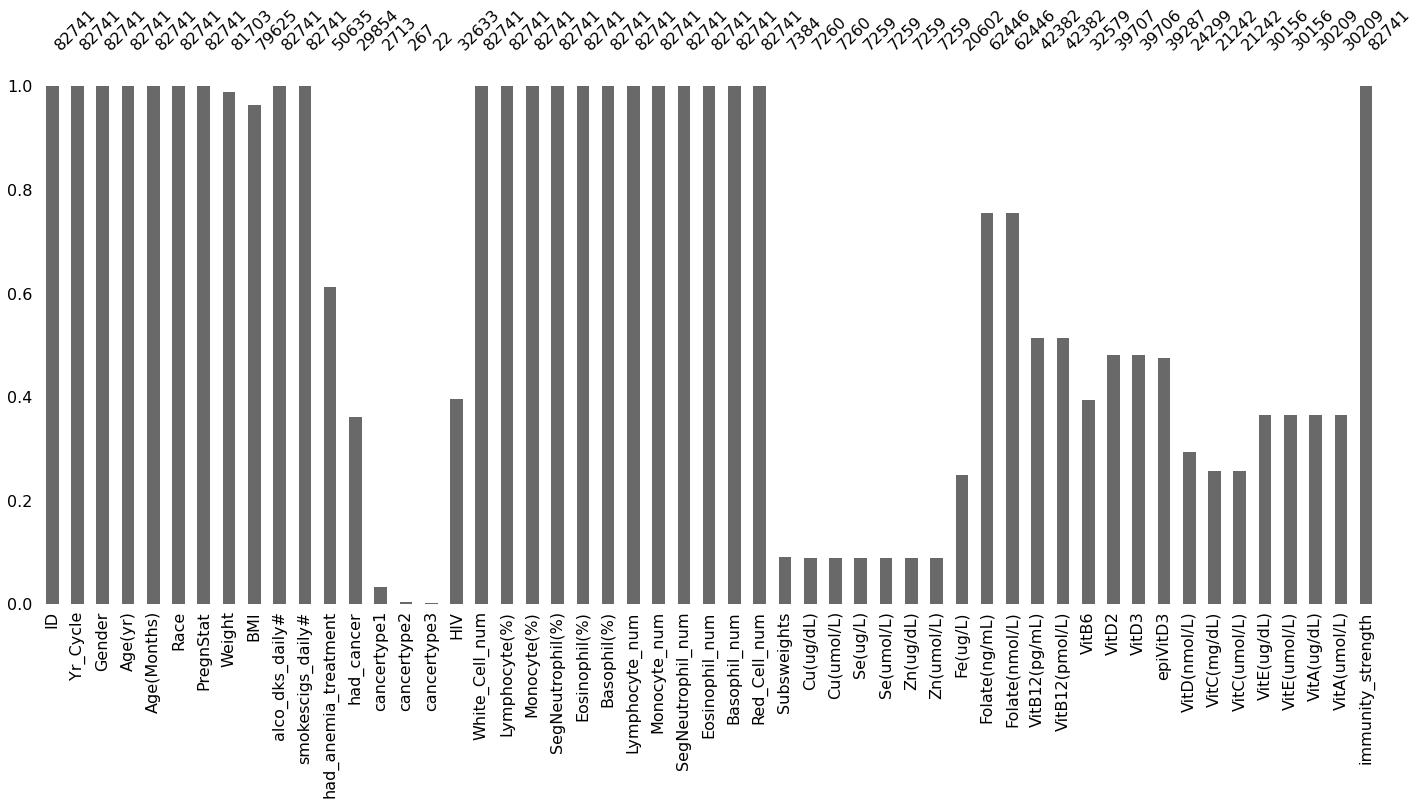

In [118]:
#Visualize missing values in the entire df
import missingno as msno
msno.bar(merged_df)

<AxesSubplot:>

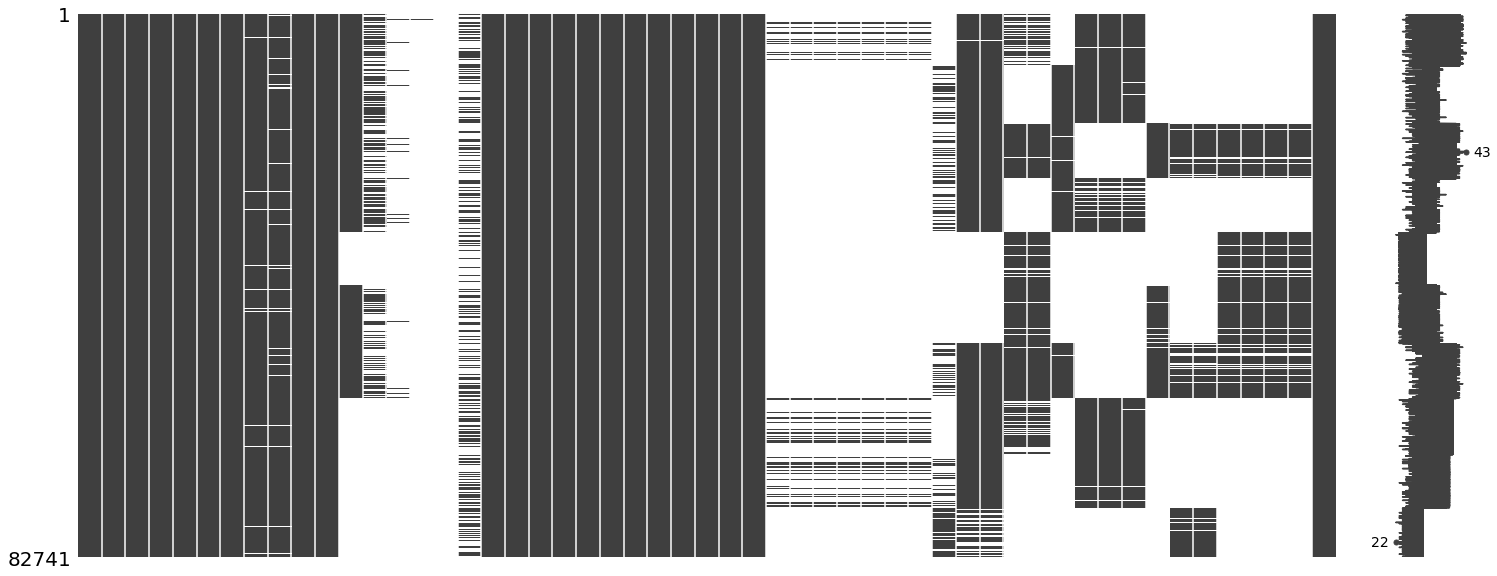

In [119]:
#Visualize missing values in the entire df
msno.matrix(merged_df)

<AxesSubplot:>

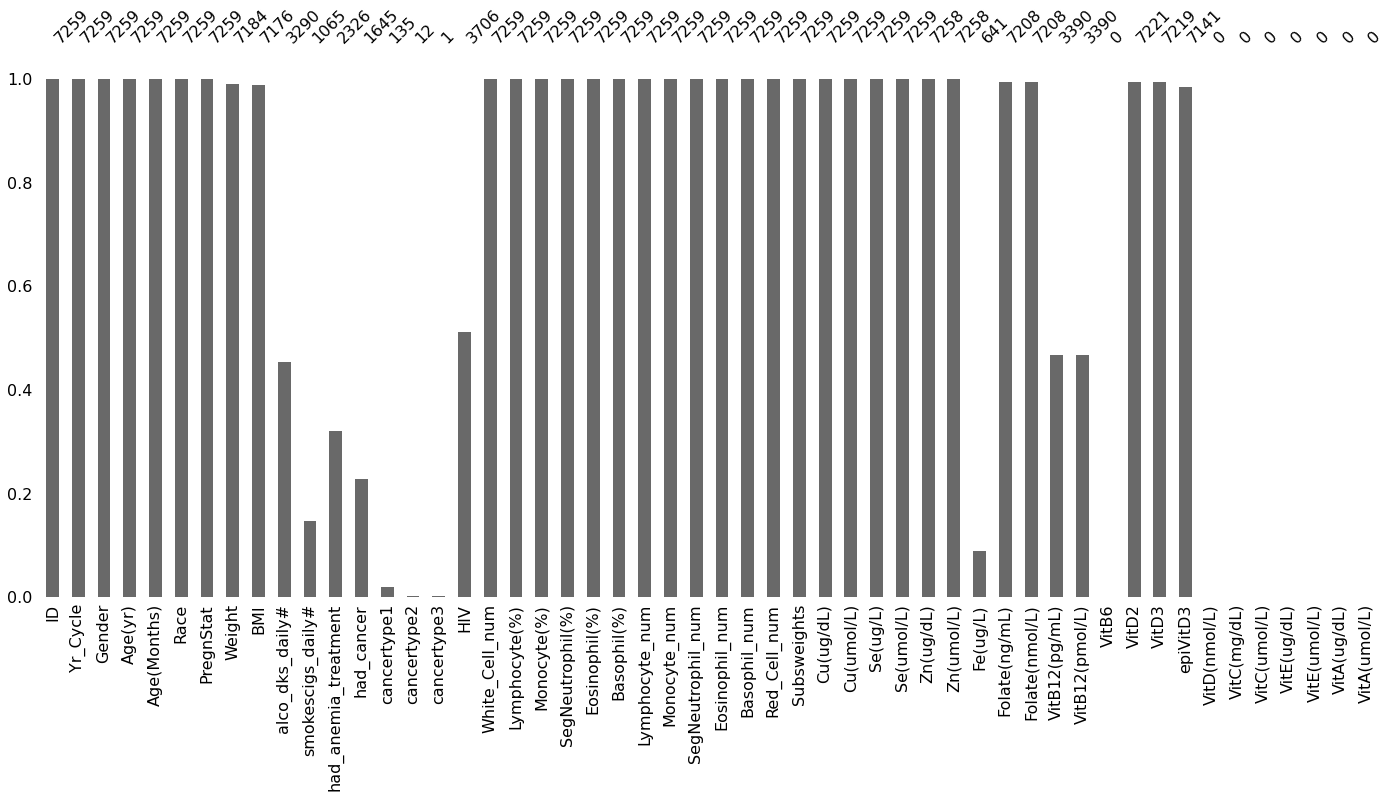

In [124]:
# the data containing cu se zn  is missing important vitamin data
msno.bar(se_df)

In [54]:
#Missing values in the the merged dataframe will be imputed using 'Datawig' module
#Select features to be used to impute missing values

Important_Feature_Selection_df_colnames = {
    "SEQN": "ID",
    "RIAGENDR": "Gender",
    "RIDAGEMN": "Age(Months)",
    "RIDRETH1": "Race",
    "RIDEXPRG": "PregnStat",
    "LBXWBCSI" : "White_Cell_num",
    "LBXLYPCT" : "Lymphocyte(%)",
    "LBXNEPCT" : "SegNeutrophil(%)",
    "LBDLYMNO" : "Lymphocyte_num",
    "LBDNENO" : "SegNeutrophil_num",
    'LBDHI': 'HIV',
    'LBDSCUSI': 'Cu(umol/L)',
    'LBDSSESI': 'Se(umol/L)',
    'LBDSZNSI': 'Zn(umol/L)',
    'LBDFERSI': 'Fe(ug/L)', 
    'LBDRFOSI':'Folate(nmol/L)', 
    'LBDB12SI':'VitB12(pmol/L)', 
    'LBXPLP':'VitB6',
    'LBXVD2MS':'VitD2', 
    'LBXVD3MS':'VitD3', 
    'LBDVIDMS':'VitD(nmol/L)',
    'LBDVICSI':'VitC(umol/L)',
    'LBDVIESI':'VitE(umol/L)',  
    'LBDVIASI':'VitA(umol/L)',
    'BMXWT':'Weight', 
    'BMXBMI':'BMI',
    'ALQ130': 'alco_dks_daily#',
    'SMD650': 'smokescigs_daily#',
    'MCQ053': 'had_anemia_treatment',
    'MCQ220': 'had_cancer',
    'Immunity': 'immunity_strength'
}

In [55]:
Important_Feature_Selection_df = merged_df[list(Important_Feature_Selection_df_colnames.values())]
Important_Feature_Selection_df.head()

,ID,Gender,Age(Months),Race,PregnStat,White_Cell_num,Lymphocyte(%),SegNeutrophil(%),Lymphocyte_num,SegNeutrophil_num,...,VitC(umol/L),VitE(umol/L),VitA(umol/L),Weight,BMI,alco_dks_daily#,smokescigs_daily#,had_anemia_treatment,had_cancer,immunity_strength
0,62161.0,1,264.0,3,2,5.1,27.0,60.1,1.4,3.1,...,NaN,NaN,NaN,69.2,23.3,0.0,0.0,2.0,2.0,2
1,62162.0,2,36.0,1,2,17.6,55.5,36.9,9.8,6.5,...,NaN,NaN,NaN,12.7,14.2,0.0,0.0,2.0,NaN,1
2,62163.0,1,168.0,5,2,5.1,44.9,36.1,2.3,1.8,...,NaN,NaN,NaN,49.4,17.3,0.0,0.0,2.0,NaN,1
3,62164.0,2,528.0,3,2,5.6,27.2,58.7,1.5,3.3,...,NaN,NaN,NaN,67.2,23.2,0.0,0.0,2.0,2.0,2
4,62165.0,2,168.0,4,2,7.5,34.8,54.3,2.6,4.1,...,NaN,NaN,NaN,69.1,27.2,0.0,0.0,2.0,NaN,1


In [56]:
Important_Feature_Selection_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82741 entries, 0 to 101315
Data columns (total 31 columns):
ID                      82741 non-null float64
Gender                  82741 non-null int64
Age(Months)             82741 non-null float64
Race                    82741 non-null int64
PregnStat               82741 non-null int64
White_Cell_num          82741 non-null float64
Lymphocyte(%)           82741 non-null float64
SegNeutrophil(%)        82741 non-null float64
Lymphocyte_num          82741 non-null float64
SegNeutrophil_num       82741 non-null float64
HIV                     32633 non-null float64
Cu(umol/L)              7260 non-null float64
Se(umol/L)              7259 non-null float64
Zn(umol/L)              7259 non-null float64
Fe(ug/L)                20602 non-null float64
Folate(nmol/L)          62446 non-null float64
VitB12(pmol/L)          42382 non-null float64
VitB6                   32579 non-null float64
VitD2                   39707 non-null float64
VitD3 

In [57]:
#Fill in missing values in the HIV column with the mode
Important_Feature_Selection_df['HIV'].fillna(Important_Feature_Selection_df['HIV'].mode()[0], inplace = True)

In [58]:
Important_Feature_Selection_df['HIV'].value_counts()

2.0    82560
1.0      168
3.0       13
Name: HIV, dtype: int64

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### Imputing missing values using Datawig 

The remaining missing values were imputed using Datawig DataWig which uses deep learning feature extractors with automatic hyperparameter tuning to impute missing values in both categorical and numerical columns. SimpleImputer method with default parameters was used for this data.

In [59]:
list(Important_Feature_Selection_df.columns)

['ID',
 'Gender',
 'Age(Months)',
 'Race',
 'PregnStat',
 'White_Cell_num',
 'Lymphocyte(%)',
 'SegNeutrophil(%)',
 'Lymphocyte_num',
 'SegNeutrophil_num',
 'HIV',
 'Cu(umol/L)',
 'Se(umol/L)',
 'Zn(umol/L)',
 'Fe(ug/L)',
 'Folate(nmol/L)',
 'VitB12(pmol/L)',
 'VitB6',
 'VitD2',
 'VitD3',
 'VitD(nmol/L)',
 'VitC(umol/L)',
 'VitE(umol/L)',
 'VitA(umol/L)',
 'Weight',
 'BMI',
 'alco_dks_daily#',
 'smokescigs_daily#',
 'had_anemia_treatment',
 'had_cancer',
 'immunity_strength']

In [60]:
pip install datawig

In [61]:

!pip install scikit-learn==0.22.1

In [62]:
import datawig

In [63]:

def fill_in_missing_data(df, a_string):
  data = df

  df_train, df_test = datawig.utils.random_split(data)

  #Initialize a SimpleImputer model
  imputer = datawig.SimpleImputer(
      # column(s) containing information about the column we want to impute
      input_columns=[
                    'Gender',
                    'Age(Months)',
                    'Race',
                    'PregnStat',
                    'White_Cell_num',
                    'Lymphocyte(%)',
                    'SegNeutrophil(%)',
                    'Lymphocyte_num',
                    'SegNeutrophil_num'], 

      output_column= a_string, # the column we'd like to impute values for
      output_path = 'imputer_model' # stores model data and metrics
      )

  #Fit an imputer model on the train data
  imputer.fit(train_df=df_train, num_epochs=50)

  #Impute missing values and return original dataframe with predictions
  new_data = imputer.predict(data)

  return new_data

In [64]:
list_of_columns_with_missing = ['Cu(umol/L)',
                                'Se(umol/L)',
                                'Zn(umol/L)',
                                'Fe(ug/L)',
                                'Folate(nmol/L)',
                                'VitB12(pmol/L)',
                                'VitB6',
                                'VitD2',
                                'VitD3',
                                'VitD(nmol/L)',
                                'VitC(umol/L)',
                                'VitE(umol/L)',
                                'VitA(umol/L)',
                                'Weight',
                                'BMI']

In [65]:
df = Important_Feature_Selection_df
for column in list_of_columns_with_missing:
  df = fill_in_missing_data(df, column)

2022-04-12 22:56:32,654 [INFO]  
========== start: fit model
2022-04-12 22:56:32,658 [WARNING]  Already bound, ignoring bind()
2022-04-12 22:56:34,808 [INFO]  Epoch[0] Batch [0-1862]	Speed: 13895.11 samples/sec	cross-entropy=17.136567	Cu(umol/L)-accuracy=14.573269
2022-04-12 22:56:37,529 [INFO]  Epoch[0] Train-cross-entropy=16.102930
2022-04-12 22:56:37,530 [INFO]  Epoch[0] Train-Cu(umol/L)-accuracy=14.597207
2022-04-12 22:56:37,535 [INFO]  Epoch[0] Time cost=4.873
2022-04-12 22:56:37,544 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2022-04-12 22:56:37,570 [INFO]  Epoch[0] Validation-cross-entropy=163.468208
2022-04-12 22:56:37,573 [INFO]  Epoch[0] Validation-Cu(umol/L)-accuracy=0.000000
2022-04-12 22:56:40,531 [INFO]  Epoch[1] Batch [0-1862]	Speed: 10090.13 samples/sec	cross-entropy=16.656925	Cu(umol/L)-accuracy=14.573269
2022-04-12 22:56:43,741 [INFO]  Epoch[1] Train-cross-entropy=15.813824
2022-04-12 22:56:43,742 [INFO]  Epoch[1] Train-Cu(umol/L)-accuracy=14.597207


In [66]:
df


,ID,Gender,Age(Months),Race,PregnStat,White_Cell_num,Lymphocyte(%),SegNeutrophil(%),Lymphocyte_num,SegNeutrophil_num,...,VitB12(pmol/L)_imputed,VitB6_imputed,VitD2_imputed,VitD3_imputed,VitD(nmol/L)_imputed,VitC(umol/L)_imputed,VitE(umol/L)_imputed,VitA(umol/L)_imputed,Weight_imputed,BMI_imputed
0,62161.0,1,264.0,3,2,5.1,27.0,60.1,1.4,3.1,...,418.357796,68.118609,2.662886,63.077710,62.801809,55.231888,23.076242,1.941450,79.681618,24.822249
1,62162.0,2,36.0,1,2,17.6,55.5,36.9,9.8,6.5,...,472.090524,63.969340,2.662886,60.743440,57.754171,58.863311,24.609806,1.784343,15.927262,18.586809
2,62163.0,1,168.0,5,2,5.1,44.9,36.1,2.3,1.8,...,438.506795,62.540058,2.662886,58.817469,57.597352,56.426256,24.267126,1.751971,56.007533,21.045789
3,62164.0,2,528.0,3,2,5.6,27.2,58.7,1.5,3.3,...,397.614338,69.415930,3.313860,65.285855,62.157052,56.874666,27.630677,1.881907,74.311103,27.084605
4,62165.0,2,168.0,4,2,7.5,34.8,54.3,2.6,4.1,...,467.640242,58.324388,2.662886,54.237226,51.915547,57.716695,20.893405,1.612188,70.786887,26.030131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101311,102952.0,2,840.0,5,2,5.1,34.9,56.2,1.8,2.9,...,468.481545,68.335961,5.146903,66.302052,57.706110,59.068423,27.217724,1.854041,65.883663,25.437937
101312,102953.0,1,504.0,1,2,8.3,28.3,60.8,2.3,5.0,...,506.175268,65.050550,2.662886,55.144560,57.473697,53.587281,27.221156,1.913157,87.975739,30.711231
101313,102954.0,2,492.0,4,2,5.1,43.5,39.9,2.2,2.0,...,436.831376,63.893205,2.957185,53.346708,54.654552,55.520194,25.777406,1.761946,80.593932,30.815168
101314,102955.0,2,168.0,4,2,11.4,33.4,57.5,3.8,6.6,...,482.295038,57.361969,2.662886,53.684580,52.942148,57.719806,21.564447,1.647626,75.651173,29.300683


In [67]:
df.to_excel("NHANES_final.xlsx")

The data was stored as an excel file. The file would not save as a csv file.